<img src="https://th.bing.com/th/id/OIP.PEaVjja4BvUe0UVbAkZCWwAAAA?pid=ImgDet&rs=1" />

# Detection of Parkinson's Disease 

### Introduction to Parkinson's disease detection using various algorithms
Parkinson's disease classification is an important task in medical diagnosis and treatment. Machine learning algorithms such as RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, and GaussianNB can be utilized to build models for accurately classifying individuals as either having Parkinson's disease or being healthy. Each algorithm has its strengths and considerations, and exploring multiple approaches can provide valuable insights into the classification problem. Here's an overview of these algorithms in the context of Parkinson's disease classification:

1. RandomForestClassifier:
RandomForestClassifier is an ensemble learning algorithm that combines multiple decision trees to make predictions. It is particularly effective in handling high-dimensional data and capturing complex relationships between features. Each decision tree is trained on a random subset of the training data, and the final prediction is made by aggregating the predictions of all the trees. RandomForestClassifier offers good generalization and can handle both numerical and categorical features.

2. DecisionTreeClassifier:
DecisionTreeClassifier constructs a tree-like model based on the training data, where each internal node represents a feature or attribute, and each leaf node represents a class label. It makes predictions by traversing the tree based on the values of the features. Decision trees are relatively easy to interpret and can handle both numerical and categorical features. However, they are prone to overfitting, especially when the tree becomes too deep or complex.

3. LogisticRegression:
LogisticRegression is a widely used algorithm for binary classification tasks. It models the relationship between the input features and the binary class labels using the logistic function. Logistic regression is particularly useful when there is a linear relationship between the features and the log-odds of the class labels. It is interpretable, computationally efficient, and works well with both numerical and categorical features. However, logistic regression assumes a linear relationship, which may not always be the case in complex datasets.

4. GaussianNB:
GaussianNB is a variant of the Naive Bayes algorithm that assumes a Gaussian distribution for the input features. It is well-suited for datasets with continuous numerical features. GaussianNB is computationally efficient, works well with small or medium-sized datasets, and can handle high-dimensional feature spaces. However, it assumes independence between the features, which may not hold true in all situations.

In [3]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from pathlib import Path
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
my_file = Path("Parkinsson disease.csv")

In [6]:
park=pd.read_csv('Parkinsson disease.csv')
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
park.shape

(195, 24)

In [8]:
park.isnull().sum().sum()

0

In [9]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
park.name.nunique()

195

In [11]:
park.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
park.duplicated().sum()

0

In [13]:
X=park
y=park['status']
X=X.drop(columns=["status",'name'])
print(X.shape,y.shape)

(195, 22) (195,)


<Axes: xlabel='status', ylabel='count'>

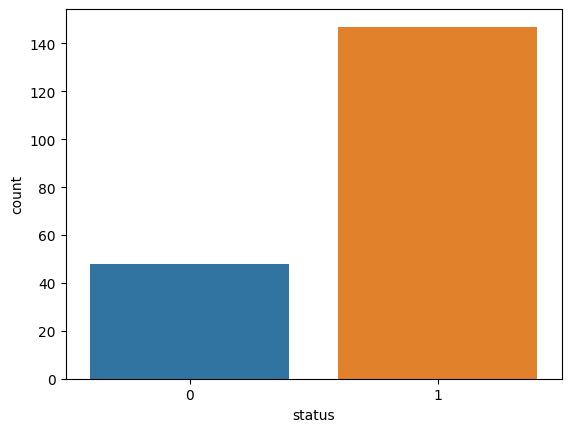

In [14]:
sns.countplot(x="status", data=park)

In [15]:
park.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [16]:
print(str((147/(147+48))*100) + '% of the data have Parkinsons Disease with a ratio of 49:16')

75.38461538461539% of the data have Parkinsons Disease with a ratio of 49:16


In [17]:
ran_under=TomekLinks(sampling_strategy='not minority')
X_under, y_under= ran_under.fit_resample(X, y)
print(Counter(y_under))

Counter({1: 141, 0: 48})


In [18]:
ran_over = RandomOverSampler(sampling_strategy='minority',random_state=1)
X_over, y_over = ran_over.fit_resample(X, y)
print(Counter(y_over))

Counter({1: 147, 0: 147})


In [19]:
ran_under = RandomUnderSampler(sampling_strategy='majority',random_state=1)
X_under, y_under= ran_under.fit_resample(X, y)
print(Counter(y_under))

Counter({0: 48, 1: 48})


In [20]:
park_over=X_over.copy()
park_over['status']=y_over
park_under=X_under.copy()
park_under['status']=y_under

Text(0.5, 1.0, 'Oversampling Minority Scatter')

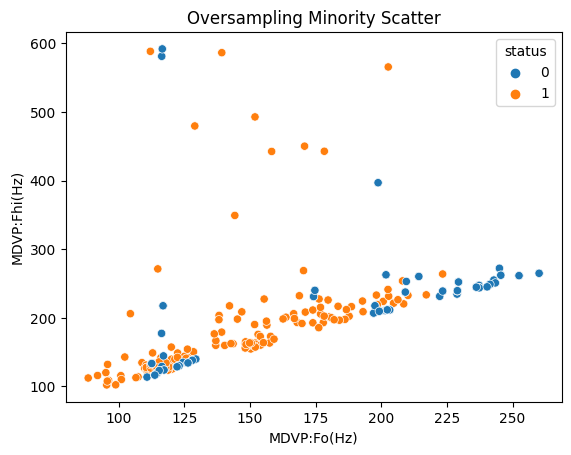

In [31]:
sns.scatterplot(data=park_over,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status')
plt.title("Oversampling Minority Scatter")

Text(0.5, 1.0, 'Oversampling Minority Count')

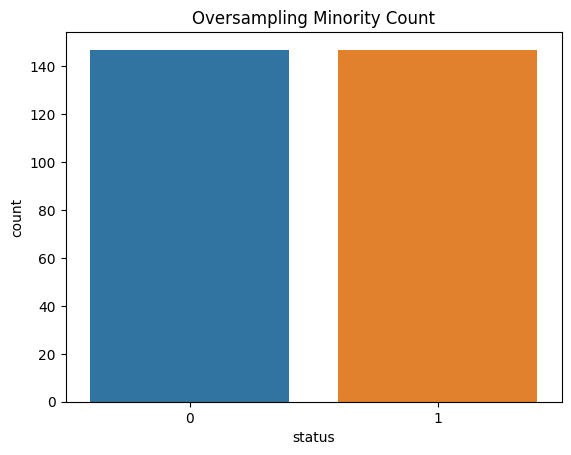

In [32]:
sns.countplot(x="status", data=park_over)
plt.title("Oversampling Minority Count")

Text(0.5, 1.0, 'Undersampling Majority Scatter')

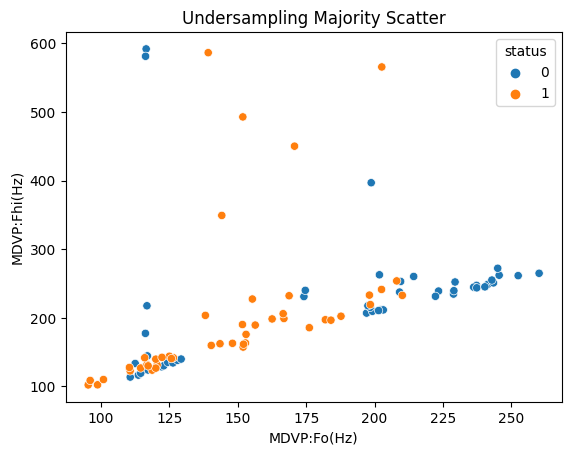

In [33]:
sns.scatterplot(data=park_under,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status')
plt.title("Undersampling Majority Scatter")

Text(0.5, 1.0, 'Undersampling Majority Count')

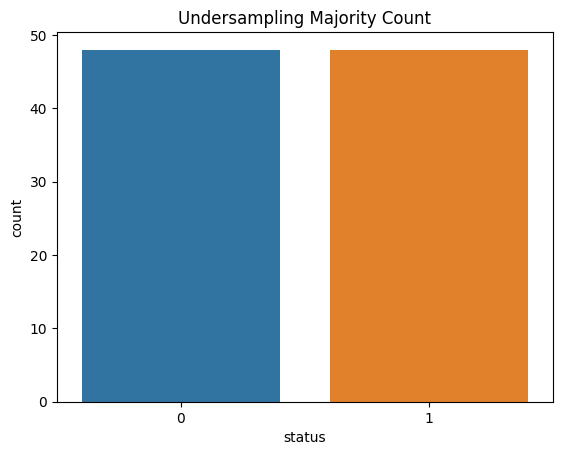

In [34]:
sns.countplot(x="status", data=park_under)
plt.title("Undersampling Majority Count")

In [35]:
park_over.duplicated().sum()

99

In [36]:
sm = SMOTE(sampling_strategy='minority', random_state=1)
X_smote, y_smote= sm.fit_resample(X, y)
print(Counter(y_smote))

Counter({1: 147, 0: 147})


In [37]:
X_smote.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [38]:
park_smote=X_smote.copy()
park_smote['status']=y_smote

[Text(0.5, 1.0, 'SMOTE Count')]

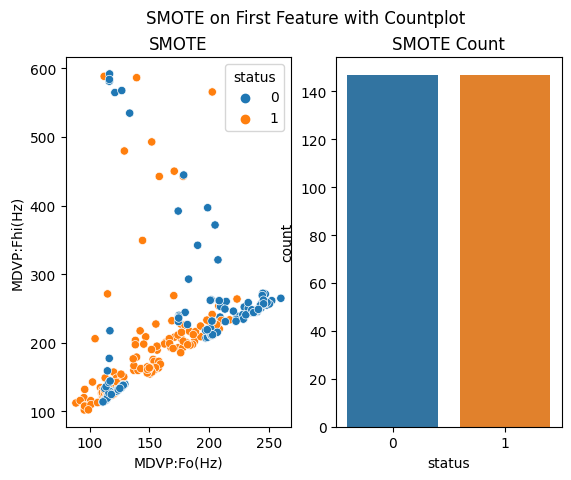

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('SMOTE on First Feature with Countplot')
sns.scatterplot(ax=ax1,data=park_smote,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status').set(title='SMOTE')
sns.countplot(ax=ax2,x="status", data=park_smote).set(title='SMOTE Count')

In [40]:
cols=X_smote.columns

In [41]:
norm_smote=pd.DataFrame(preprocessing.normalize(X_smote),columns=cols)
norm_over=pd.DataFrame(preprocessing.normalize(X_over),columns=cols)
norm_under=pd.DataFrame(preprocessing.normalize(X_under),columns=cols)

In [42]:
scale_under=pd.DataFrame(preprocessing.scale(X_under),columns=cols)
scale_over=pd.DataFrame(preprocessing.scale(X_over),columns=cols)
scale_smote=pd.DataFrame(preprocessing.scale(X_smote),columns=cols)

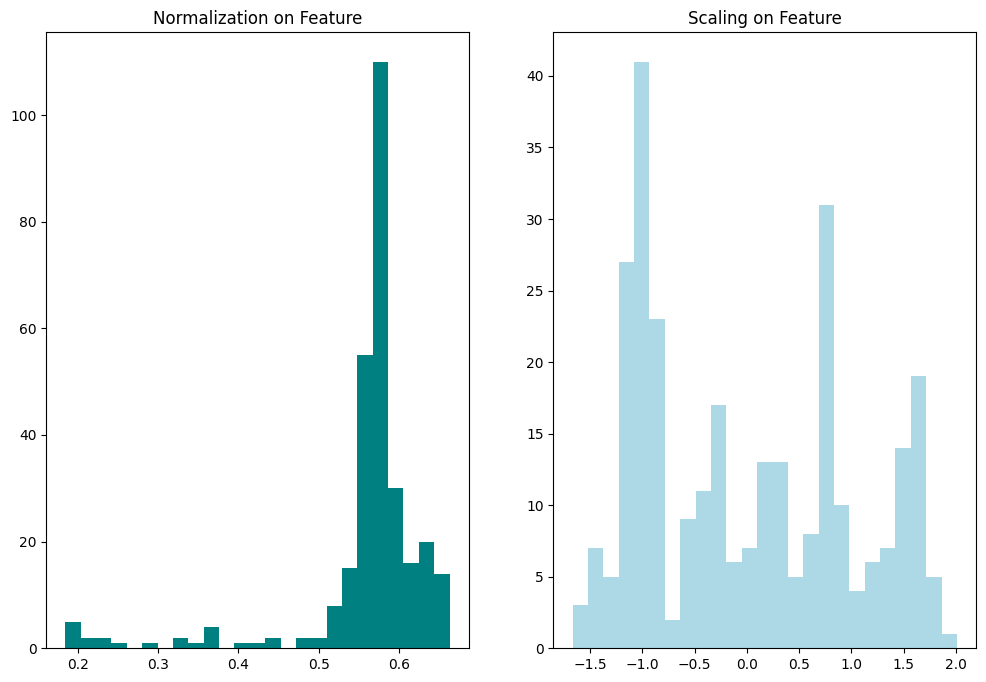

In [49]:
fig, axs = plt.subplots(1,2,figsize=(12,8))
axs[0].hist(norm_smote['MDVP:Fo(Hz)'], bins = 25, color = 'teal')
axs[0].title.set_text('Normalization on Feature')
axs[1].hist(scale_smote['MDVP:Fo(Hz)'], bins = 25, color = 'lightblue')
axs[1].title.set_text('Scaling on Feature')

In [50]:
def predictmodels(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  clf_A = RandomForestClassifier(random_state=3)
  clf_B = DecisionTreeClassifier(random_state=3)
  clf_C = AdaBoostClassifier(random_state=3)

  results = {}
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      results = {}
      start = time()
      clf = clf.fit(X_train, y_train)
      end = time()
      results['train_time'] = end-start
        
      start = time()
      predictions_test = clf.predict(X_test)
      end = time()
      print(clf)
      print('prediction_time: ' + str(end-start))
      #print('Accuracy Score: ' + str(accuracy_score(y_test,predictions_test)))
      print('fb Score: '+ str(fbeta_score(y_test,predictions_test,beta=0.5)))
      print()
  return X_train, X_test, y_train, y_test

In [51]:
def Gridsrch(clf,n):
  if n==1:
    parameters={'n_estimators':[80,120,150],'min_samples_leaf':[1,2,3]}
  else:
    parameters={'n_estimators':[200,300,400],'learning_rate':[1.0,1.2,1.8]}

  scorer=make_scorer(fbeta_score,beta=0.1)

  grid_layout=GridSearchCV(clf,parameters,scoring=scorer)

  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  print(str(clf) +" before Optimization: " + str(fbeta_score(y_test,predictions,beta=0.5)))
  print(str(clf) +" after Optimization: " + str(fbeta_score(y_test,best_predictions,beta=0.5)))
  print(grid_fit.best_params_)
  return grid_fit

In [52]:
X_train, X_test, y_train, y_test=predictmodels(scale_smote,y_smote)

Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.007000446319580078
fb Score: 0.9541984732824427

DecisionTreeClassifier(random_state=3)
prediction_time: 0.0
fb Score: 0.8888888888888888

AdaBoostClassifier(random_state=3)
prediction_time: 0.005000114440917969
fb Score: 0.934959349593496



In [53]:
Gridsrch(RandomForestClassifier(random_state=3),1)

RandomForestClassifier(random_state=3) before Optimization: 0.9541984732824427
RandomForestClassifier(random_state=3) after Optimization: 0.9541984732824427
{'min_samples_leaf': 1, 'n_estimators': 80}


GridSearchCV(estimator=RandomForestClassifier(random_state=3),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [80, 120, 150]},
             scoring=make_scorer(fbeta_score, beta=0.1))

In [54]:
X_train, X_test, y_train, y_test=predictmodels(scale_over,y_over)

Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.0060002803802490234
fb Score: 0.9842519685039369

DecisionTreeClassifier(random_state=3)
prediction_time: 0.0
fb Score: 0.9663865546218487

AdaBoostClassifier(random_state=3)
prediction_time: 0.00500035285949707
fb Score: 0.9842519685039369



In [55]:
Gridsrch(RandomForestClassifier(random_state=3),1)

RandomForestClassifier(random_state=3) before Optimization: 0.9842519685039369
RandomForestClassifier(random_state=3) after Optimization: 0.9842519685039369
{'min_samples_leaf': 2, 'n_estimators': 120}


GridSearchCV(estimator=RandomForestClassifier(random_state=3),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [80, 120, 150]},
             scoring=make_scorer(fbeta_score, beta=0.1))

In [56]:
X_train, X_test, y_train, y_test=predictmodels(scale_under,y_under)

Training set has 76 samples.
Testing set has 20 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.005998849868774414
fb Score: 0.9523809523809523

DecisionTreeClassifier(random_state=3)
prediction_time: 0.0
fb Score: 0.9259259259259258

AdaBoostClassifier(random_state=3)
prediction_time: 0.003999233245849609
fb Score: 0.9259259259259258



In [57]:
Gridsrch(RandomForestClassifier(random_state=3),1)

RandomForestClassifier(random_state=3) before Optimization: 0.9523809523809523
RandomForestClassifier(random_state=3) after Optimization: 0.9523809523809523
{'min_samples_leaf': 3, 'n_estimators': 150}


GridSearchCV(estimator=RandomForestClassifier(random_state=3),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [80, 120, 150]},
             scoring=make_scorer(fbeta_score, beta=0.1))

In [58]:
results = pd.DataFrame()
results['Model']=['SMOTE','Oversampling','Undersampling']
results['fb-Score']=[0.9541984732824427,0.9842519685039369,0.9782608695652175]
results.sort_values(by='fb-Score',ascending=False)

,Model,fb-Score
1,Oversampling,0.984252
2,Undersampling,0.978261
0,SMOTE,0.954198


In [59]:
X_train, X_test, y_train, y_test=predictmodels(X_over,y_over)

Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.005999088287353516
fb Score: 0.9842519685039369

DecisionTreeClassifier(random_state=3)
prediction_time: 0.0009996891021728516
fb Score: 0.9663865546218487

AdaBoostClassifier(random_state=3)
prediction_time: 0.004999637603759766
fb Score: 0.9842519685039369



In [60]:
best=Gridsrch(AdaBoostClassifier(random_state=3),2)

AdaBoostClassifier(random_state=3) before Optimization: 0.9842519685039369
AdaBoostClassifier(random_state=3) after Optimization: 0.9923664122137406
{'learning_rate': 1.2, 'n_estimators': 200}


In [61]:
estimator=best.best_estimator_

In [62]:
preds=estimator.predict(X_test)

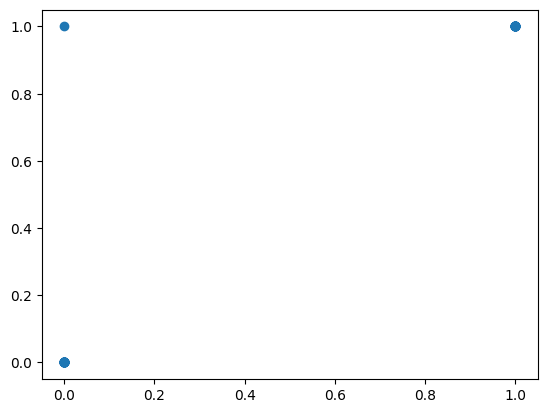

In [63]:
plt.scatter(x=preds,y=y_test)

In [64]:
df_pf = pd.DataFrame(preds, columns=['Predictions'])
df_pf['Targets'] = y_test.reset_index(drop=True)
df_pf.loc[df_pf['Predictions']!=df_pf['Targets']]

,Predictions,Targets
30,0,1


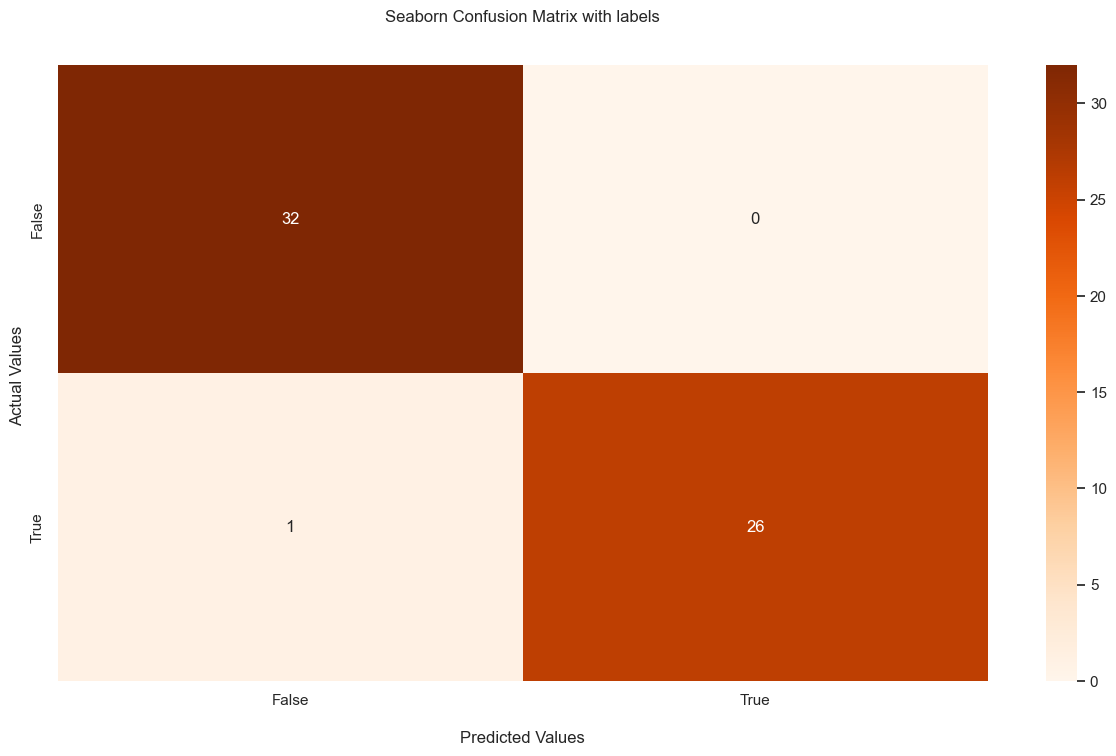

In [66]:
cm=confusion_matrix(y_test,preds)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(cm, annot=True, cmap='Oranges')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### Conclusion:
In conclusion, RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, and GaussianNB are valuable machine learning algorithms for Parkinson's disease classification. Each algorithm has its own strengths and considerations, and exploring multiple approaches can provide insights into the classification problem. The choice of algorithm depends on factors such as the nature of the dataset, interpretability requirements, computational efficiency, and desired performance metrics.